In [1]:
%load_ext jupyter_black

In [3]:
from datetime import datetime
from griblib.hrrr import load_hrrr

In [4]:
hrrr = load_hrrr(datetime(2022, 6, 14), 24)
hrrr

HRRR(start_date=datetime.datetime(2022, 6, 14, 0, 0), hours=24, date_range=DatetimeIndex(['2022-06-14', '2022-06-15'], dtype='datetime64[ns]', freq='D'), fs=<s3fs.core.S3FileSystem object at 0x7f9a93bcb160>)

In [18]:
refd = hrrr.surface.forecast.reflectivity()["REFD"]
a = refd.compute()
f"{a.shape=}\n{a.size=:,}"

'a.shape=(2, 72, 1059, 1799), a.size=274,340,304'

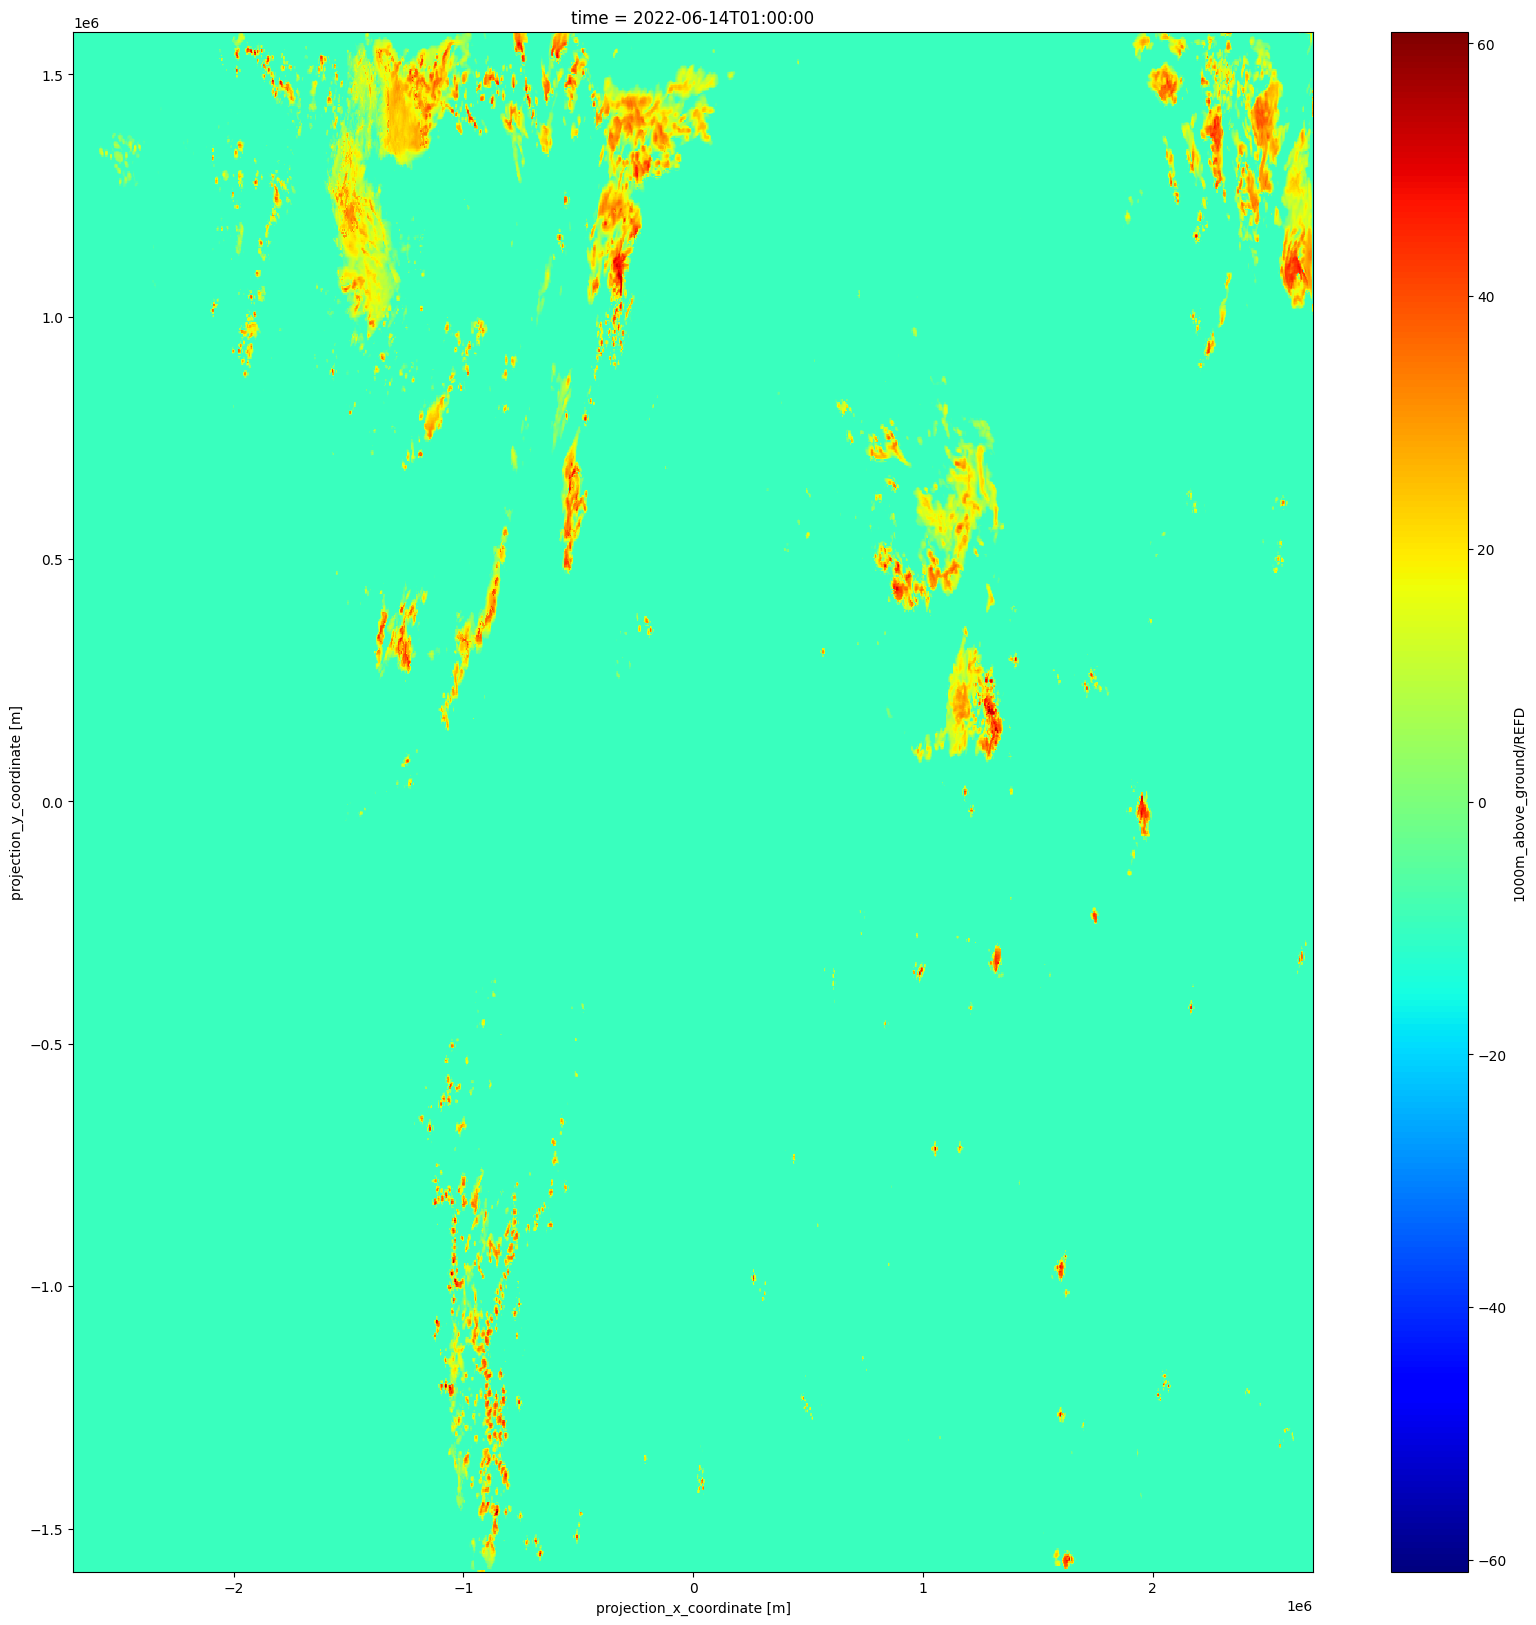

In [11]:
import matplotlib.pyplot as plt

refd[0][0].plot(figsize=(20, 20), cmap=plt.get_cmap("jet"))

In [6]:
# parameter_long_name: defines the method name
# vertical_level: is an argument passed into the method
# parameter_short_name: is used internally to retrive and index the data
hrrr.surface.table.loc["reflectivity", "vertical_level"].tolist()
# (hrrr.surface.table == "Reflectivity").any()

['263K_level',
 '263K_level',
 '1000m_above_ground',
 '263K_level',
 '4000m_Above_Ground']

In [7]:
# each long_name method has a default vertical_level set
hail = hrrr.surface.forecast.hail()
hail

<xarray.Dataset>
Dimensions:                  (projection_x_coordinate: 1799,
                              projection_y_coordinate: 1059, time: 72,
                              valid_time: 2)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
  * time                     (time) datetime64[ns] 2022-06-14T01:00:00 ... 20...
Dimensions without coordinates: valid_time
Data variables:
    HAIL_1hr_max_fcst        (valid_time, time, projection_y_coordinate, projection_x_coordinate) float16 dask.array<chunksize=(1, 72, 150, 150), meta=np.ndarray>
    forecast_period          (valid_time, time) timedelta64[ns] dask.array<chunksize=(1, 72), meta=np.ndarray>
    forecast_reference_time  (valid_time) datetime64[ns] 2022-06-14 2022-06-15

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a = hail["HAIL_1hr_max_fcst"][0][0]
alpha = np.where(a > 0, 1, 0)
a

NameError: name 'hail' is not defined

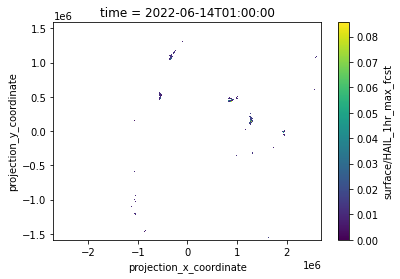

In [17]:
a.plot(alpha=alpha, x="projection_x_coordinate", y="projection_y_coordinate")